In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
house = pd.read_csv("C:/Users/Marcy/Desktop/data sets/Housing Data/train.csv")
test =  pd.read_csv("C:/Users/Marcy/Desktop/data sets/Housing Data/test.csv")

#### I will need 
pandas for loading in data, numpy for square-rooting your model estimates, sklearn for the bulk of the linear regression and modeling work, and matplotlib to graph the model's residuals to get a visual representation of accuracy.

#### check 
column names, unique values in each column of house dataset

In [2]:
for column in house.columns:
    print('Column: {} - Unique Values: {}'.format(column, house[column].unique()))

Column: Id - Unique Values: [   1    2    3 ... 1458 1459 1460]
Column: MSSubClass - Unique Values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Column: MSZoning - Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column: LotFrontage - Unique Values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Column: LotArea - Unique Values: [ 8450  9600 11250 ... 17217 13175  9717]
Column: Street - Unique Values: ['Pave' 'Grvl']
Column: Alley - Unique Values: [nan 'Grvl' 'Pave

#### There are 79 independent variables, or predictor variables.

#### Checking missing values and data types

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 1460 observations and 81 columns. With the zero index, there's 79 IV, with column 80 held as the dependent variable.

#### Some of the year built columns are ordinal, but appear as integers in the data: columns 19(YearBuilt), 20 (YearRemodAdd), 59 (GarageYrBlt) and 77 (YrSold) 

#### There are missing values for Alley, PoolQC, Fence, MiscFeature. This makes sense, as not every house will have a pool or a fence. But the values must be dropped or addressed - use fillna(0) - will this introduce multicollinearity?

In [4]:
house.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Go through each column with missing values and determine best solution. drop columns or rows/ or replace missing values with another value w/ df['column'].fillna(0)

In [5]:
pd.set_option("display.max_rows",90)
house.isna().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#house.isnull().sum()

#### Drop columns 
which have no bearing on house prices, such as ID, or the analysis, such as which neighborhood the house is in, or whether it has an alley. PoolQC, or quality is redundant with PoolArea.

In [7]:
house.drop(columns= ['Id', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'MasVnrArea', 'BsmtExposure', 'PoolQC', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'Fence'], axis=1, inplace=True)

#### Time to encode the categorical data with levels 
- pandas get_dummies makes the data frame too large and bloated with binary values for all of the levels inside the different columns for house qualities. First I'll drop the columns unncessary for my purposes here, then recode the objects using sklearn, with a short and easy for loop, rather than deal with some 45 column names. 

In [8]:
house.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
list1= house.select_dtypes("O")
list_objects = []
for i in list1:
    list_objects.append(i)
    
    
    
for i in list_objects:
    house[i] = le.fit_transform(house[i])

In [10]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice
0,60,3,65.0,8450,1,4,0,5,7,5,...,2,0,61,0,0,0,0,0,4,208500
1,20,3,80.0,9600,1,2,0,2,6,8,...,2,298,0,0,0,0,0,0,4,181500
2,60,3,68.0,11250,1,4,0,5,7,5,...,2,0,42,0,0,0,0,0,4,223500
3,70,3,60.0,9550,1,0,0,5,7,5,...,2,0,35,272,0,0,0,0,0,140000
4,60,3,84.0,14260,1,2,0,5,8,5,...,2,192,84,0,0,0,0,0,4,250000


In [11]:
house.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotConfig          0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageCars   

#### x is all independent variables; y is the single column SalePrice.

#### fill lot frontage with mean
It doesn't make sense to fill lot frontage with zeroes - a lot is at least as wide as the house that sits on it, plus any setbacks required by the city or township rules. 

In [12]:
house['LotFrontage'].mean()


70.04995836802665

In [13]:
house['LotFrontage'] = house['LotFrontage'].fillna(value=70.05)

In [14]:
house[['Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',  'BsmtQual', 'BsmtCond',  'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageQual', 'GarageCond']] = house[['Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea' , 'BsmtQual', 'BsmtCond',  'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageQual', 'GarageCond']].fillna(value=0)

In [15]:
house['LotFrontage'].isna().sum()

0

In [16]:
house.isna().sum()  

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotConfig        0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

#### Saving recoded housing data to a csv file so it can be imported into R for further analysis.

In [17]:
y = house['SalePrice']
x = house.drop(['SalePrice'], axis=1)

In [18]:
house.to_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/house.csv', index=False)
x.to_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/x.csv', index=False) 
y.to_csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/y.csv',index=False)

#### Some preliminary
graphs to get a sense of the data.

In [73]:
#Pearson Correlation Heatmap
house.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
#plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/heatmapFig.png')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice
MSSubClass,1.0,0.036,-0.36,-0.14,-0.025,0.076,0.75,0.4,0.033,-0.059,0.028,0.041,-0.12,-0.031,-0.089,-0.14,-0.033,-0.017,-0.0033,0.058,-0.037,-0.0095,0.018,-0.07,0.042,-0.066,-0.14,-0.24,0.048,0.021,-0.1,0.052,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.01,0.04,0.0037,-0.046,0.058,-0.04,-0.099,0.037,0.037,-0.06,-0.013,-0.0061,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.025,-0.084
MSZoning,0.036,1.0,-0.11,-0.034,0.088,-0.0099,0.0057,-0.11,-0.16,0.19,-0.31,-0.17,-0.0003,0.0051,-0.0086,0.007,-0.049,0.2,-0.096,-0.24,0.13,-0.007,0.025,-0.049,-0.029,0.028,-0.047,-0.088,0.057,0.13,-0.05,-0.071,-0.056,-0.051,0.012,-0.083,-0.019,0.0072,-0.2,-0.13,-0.016,0.049,0.13,-0.043,-0.096,-0.011,0.017,-0.16,-0.19,-0.12,-0.05,-0.1,-0.0095,-0.15,0.12,0.00036,0.019,-0.0031,0.0093,0.0095,-0.17
LotFrontage,-0.36,-0.11,1.0,0.31,-0.037,-0.18,-0.41,0.032,0.23,-0.053,0.12,0.083,0.15,0.082,0.074,0.099,-0.017,-0.18,0.048,0.099,-0.17,0.043,-0.027,0.22,-0.03,0.043,0.12,0.36,-0.021,-0.08,0.069,0.06,0.41,0.072,0.037,0.37,0.091,-0.0064,0.18,0.048,0.24,-0.0058,-0.19,0.32,0.03,0.24,-0.19,0.27,0.32,0.013,-0.00048,0.089,0.077,0.14,0.0098,0.062,0.038,0.18,0.0012,0.058,0.33
LotArea,-0.14,-0.034,0.31,1.0,-0.2,-0.12,-0.21,-0.033,0.11,-0.0056,0.014,0.014,0.077,0.15,0.0043,-0.0039,-0.0049,-0.057,0.015,-0.011,-0.066,0.0073,-0.062,0.21,-0.071,0.11,-0.0026,0.26,0.028,0.0042,0.05,0.044,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,-0.057,0.19,-0.022,0.27,-0.15,0.15,0.18,-0.01,-0.0047,0.015,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.034,0.26
Street,-0.025,0.088,-0.037,-0.2,1.0,0.014,-0.018,0.024,0.059,0.043,0.021,0.065,-0.02,0.0081,0.0025,0.0062,0.011,0.05,0.0059,0.035,-0.026,-0.015,-0.012,-0.016,0.062,-0.038,0.035,0.0051,0.0079,-0.054,0.07,0.021,0.0059,0.047,0.0077,0.044,-0.051,0.015,0.046,0.028,0.029,0.014,-0.025,0.047,-0.016,-0.0053,-0.024,-0.02,-0.048,-0.024,-0.023,0.025,-0.018,-0.0057,0.023,0.0075,-0.033,0.0044,-0.023,0.0061,0.041
LotConfig,0.076,-0.0099,-0.18,-0.12,0.014,1.0,0.11,-0.033,-0.031,-0.031,0.014,-0.0052,-0.01,-0.068,0.023,0.0055,0.0029,-0.0025,0.035,-0.012,0.023,0.035,0.019,-0.024,0.0001,-0.01,-0.011,-0.04,-2.4e-05,-0.01,-0.0037,-0.025,-0.062,-0.052,-0.005,-0.089,-0.013,-0.0099,-0.0075,-0.026,-0.057,-0.0025,-0.01,-0.049,-0.021,-0.061,0.021,-0.067,-0.064,0.033,0.042,-0.045,-0.036,-0.055,-0.07,-0.03,-0.0047,-0.047,-0.018,0.052,-0.067
BldgType,0.75,0.0057,-0.41,-0.21,-0.018,0.11,1.0,0.067,0.05,-0.16,0.22,0.1,-0.054,-0.038,-0.11,-0.14,-0.028,-0.088,0.085,0.14,-0.097,0.041,-0.042,0.007,0.031,-0.017,-0.051,-0.05,0.0055,-0.01,0.018,0.074,-0.074,-0.084,-0.03,-0.13,0.052,-0.0034,0.071,-0.0076,-0.28,0.18,-0.025,-0.2,0.0096,-0.09,0.042,0.0074,-0.061,0.073,0.068,0.059,-0.013,-0.037,-0.11,-0.023,-0.028,-0.028,-0.0096,-0.0035,-0.086
HouseStyle,0.4,-0.11,0.032,-0.033,0.024,-0.033,0.067,1.0,0.22,-0.031,0.27,0.21,-0.033,0.045,-0.036,-0.071,-0.13,-0.093,0.068,0.19,-0.15,-0.0017,-0.056,0.011,-0.0066,-0.028,-0.14,-0.14,-0.075,-0.07,0.075,0.17,-0.17,0.48,-0.083,0.26,0.037,0.042,0.24,0.41,0.18,-0.0042,-0.083,0.25,0.052,0.1,-0.011,0.2,0.16,0.019,-0.028,0.12,0.088,0.14,-0.065,-0.027,-0.025,0.077,-0.041,0.023,0.18
OverallQual,0.033,-0.16,0.23,0.11,0.059,-0.031,0.05,0.22,1.0,-0.092,0.57,0.55,0.17,0.075,0.16,0.15,0.019,-0.63,0.14,0.4,-0.61,-0.0016,-0.0064,0.24,0.046,-0.059,0.31,0.54,-0.11,-0.43,0.27,0.25,0.48,0.3,-

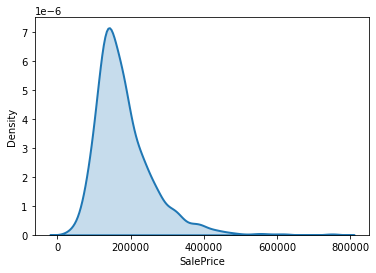

In [20]:
sns.kdeplot(x=house['SalePrice'], shade=True, linewidth=2);
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/pricedistFig.png')

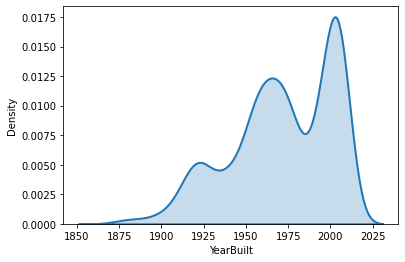

In [21]:
sns.kdeplot(x= house['YearBuilt' ] , shade=True, linewidth=2);

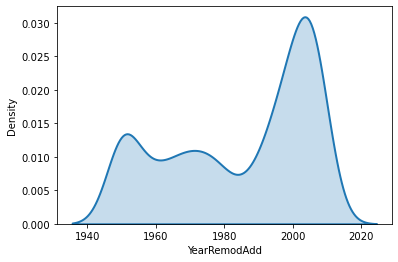

In [22]:
sns.kdeplot(x=house['YearRemodAdd'], shade=True, linewidth=2);

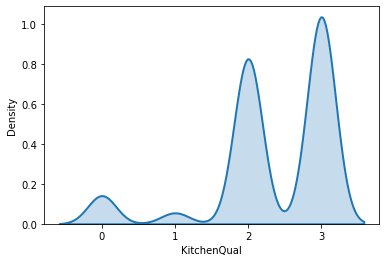

In [23]:
sns.kdeplot(x=house['KitchenQual'], shade=True, linewidth=2);

#### Scatter plot of data on when a home was built versus sale price. the dataset only goes to 2010, hence the cap on the plot.

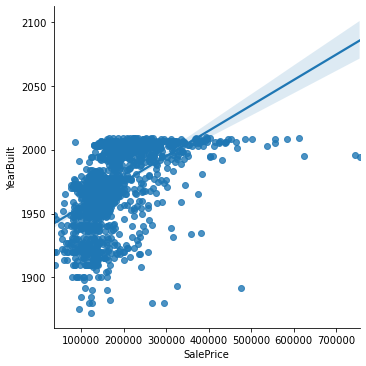

In [24]:
sns.lmplot(x="SalePrice", y="YearBuilt", data=house);
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/builtscatter.png')

#### Is there any correlation between sale price and remodeling a home? Yes there is. 

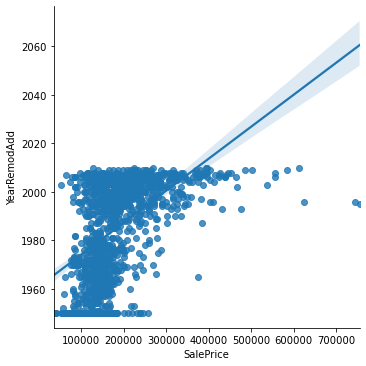

In [25]:
sns.lmplot(x="SalePrice", y="YearRemodAdd", data=house);
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/remodFig.png')

#### Garage quality is rated 0-5 - seems most garages rate 4 here. 

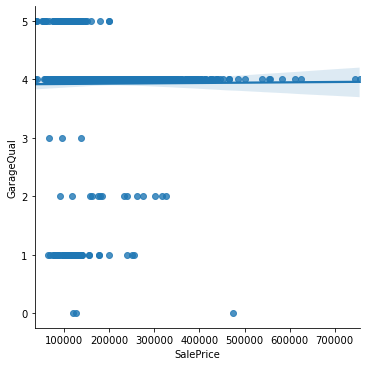

In [26]:
sns.lmplot(x="SalePrice", y="GarageQual", data=house);
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/garagequalFig.png')

#### Is there any type of correlation between house price and the size of the yard?

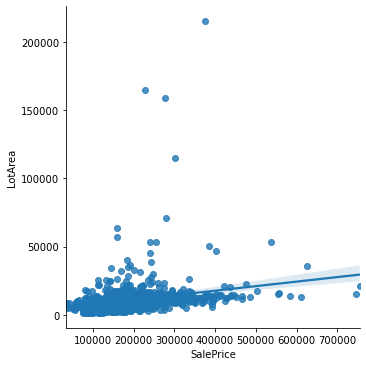

In [27]:
sns.lmplot(x="SalePrice", y="LotArea", data=house);
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/lotareapriceFig.png')

#### How much do homebuyers value having a basement?

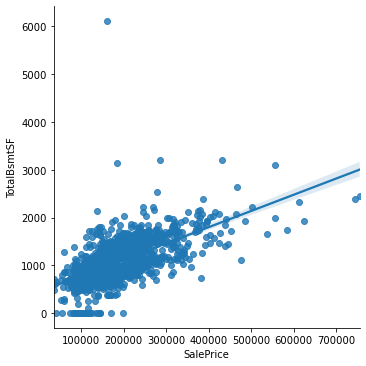

In [28]:
sns.lmplot(x="SalePrice", y="TotalBsmtSF", data=house);

In [29]:
#creating another dataset to hold ranges
house2 = house

In [30]:
#set sale price into ranges
def price_range(series):
    if series < 9999:
        return "0-10000"
    elif 10000 < series < 25000:
        return "10000-25000"
    elif 25000 < series < 50000:
        return "25000-50000"
    elif 50000 < series < 100000:
        return "50000-100000"
    elif 100000 < series < 150000:
        return "100000-150000"
    elif 150000 < series < 200000:
        return "150000-200000"
    elif 200000 < series < 300000:
        return "200000-300000"
    elif 300000 < series < 400000:
        return "300000-400000"
    elif 400000 < series < 500000:
        return "400000-500000"
    elif 500001 <= series:
        return "501000"

house2['SalePriceRange'] = house['SalePrice'].apply(price_range)

house2['SalePriceRange'].value_counts(sort=True)

100000-150000    492
150000-200000    406
200000-300000    312
50000-100000     109
300000-400000     87
400000-500000     19
501000             9
25000-50000        5
Name: SalePriceRange, dtype: int64

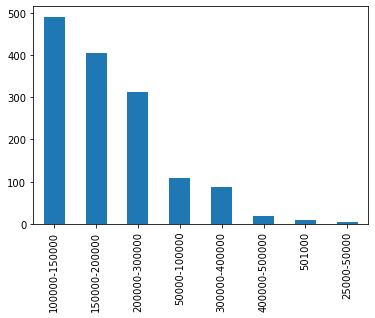

In [31]:
house['SalePriceRange'].value_counts(sort=True).plot(kind="bar")
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/barpricerangeFig.png')

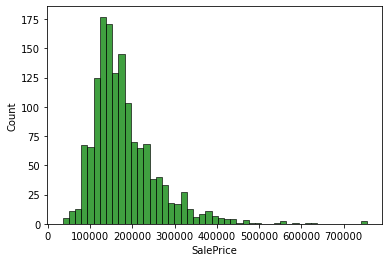

In [32]:
sns.histplot(x=house['SalePrice'], color='green')
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/priceFig.png')

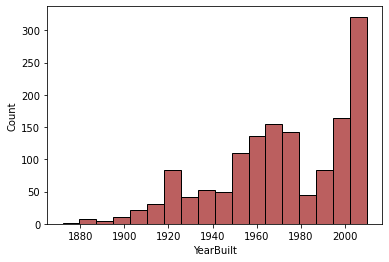

In [33]:
sns.histplot(x=house['YearBuilt'], color='brown')
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/builtFig.png')

#### During a recession in the early 1980s, it's easy to see there were no new houses being built. Conversely, during a boom after 2000, new housing starts took off. 

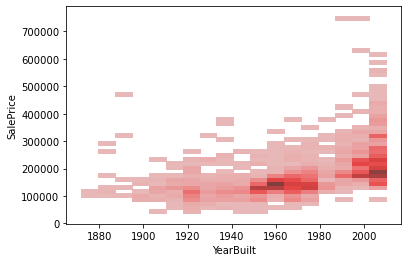

In [34]:
sns.histplot(x=house['YearBuilt'], y=house['SalePrice'], color='brown')
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/histplotbuiltFig.png')

#### From a linear model and stepwise regression,
the top features that affect housing prices are in the following subset of housing data.

In [35]:
topFeatures = house [['OverallQual','GrLivArea','YearBuilt','OverallCond','LotArea']]

SecondsetTopFeatures = house [['FireplaceQu','RoofMatl','BldgType', 'KitchenQual','Functional','HeatingQC','ScreenPorch','SaleCondition','MSZoning','KitchenAbvGr','Street','WoodDeckSF','Fireplaces','BsmtQual','1stFlrSF','BsmtFinType1','FullBath','LotFrontage']]

In [36]:
#'BsmtFullBath', 'BsmtHalfBath', 'GarageCar' have null values after fillna.
SecondsetTopFeatures.isnull().sum()

FireplaceQu      0
RoofMatl         0
BldgType         0
KitchenQual      0
Functional       0
HeatingQC        0
ScreenPorch      0
SaleCondition    0
MSZoning         0
KitchenAbvGr     0
Street           0
WoodDeckSF       0
Fireplaces       0
BsmtQual         0
1stFlrSF         0
BsmtFinType1     0
FullBath         0
LotFrontage      0
dtype: int64

#### y and top Features
will be used in two different train test splits, with an 60/40 split for training and testing samples. The target variable is housing price, or y.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(topFeatures,y, test_size = .4)

#### Examine the shape of the data I'll be using for the machine learning algorithm.

In [38]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(876, 5) (876,)
(584, 5) (584,)


#### This is showing that in the x_train dataset, there are 1751 rows and 5 columns, and in the x_test dataset, there are 1168 rows and 5 columns. So you can see how the training and testing data is broken up.



#### Creating the linear regression model
Named lm, this model will be fit to the training data using the.fit() function, specifying the topFeatures and y training sets. 

In [39]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

#### Examine predictions - while the array that is returned isn't super enlightening, plotting it give a better idea of how accurate the predictions, and thus, the model is. 

In [40]:
predictions = lm.predict(x_test)
predictions

array([182560.92036542, 142247.70330847, 115953.32243143, 120913.78094151,
       256388.1972789 , 199631.58422781, 281278.40967628, 230620.52937048,
       327897.19761134, 140388.32756999,  88814.39279989, 340877.57739974,
       103734.97363203, 242136.66289703, 180942.25729041, 137105.71358087,
       196097.81600742,  66169.42568061, 163714.26431312, 224533.42012273,
       174201.25082884, 239896.41557005, 233513.76705853, 197600.28985898,
        89917.55495301,  97211.68709001, 209042.62825772, 102740.70465438,
       227692.25350471, 243860.46097581,  95756.9055976 , 190746.45231856,
       187333.93564329,  87798.44213386, 191661.02775261, 254532.1825026 ,
        84086.58698025, 285050.10919002, 115940.52710107, 143563.20813538,
       250222.08867083, 161265.47521188, 173761.15210442, 254926.76689543,
       282031.4794782 , 169616.62434057, 157401.22948217, 114258.5951397 ,
       112852.0146886 , 242180.11030162,  72762.87353746, 136075.49456773,
       121399.74863045,  

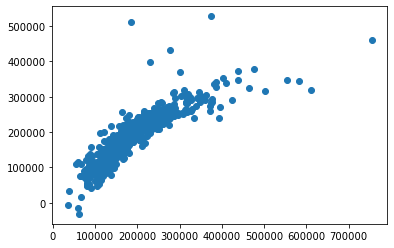

In [41]:
plt.scatter(y_test, predictions)
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/accuracyFig.png')

#### Another way to gauge accuracy 
is to print an accuracy score for this model. 

In [42]:
print("Score:", lm.score(x_test, y_test))

Score: 0.7407503031708673


#### This means this model is accurate    74 % of the time. 
The next way to determine model fit is to look at the error terms. This is just another way to quantify the residuals - how close is this predicted data from the real data? There are many different mathematical ways to examine error, but we will look at mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE). There are no cut-off values when interpreting error scores, because each model with different variables and different units for those variables will generate radically different error values. The main thing to know about interpreting error is that the smaller the error value, the better, and they range from zero to infinity. We want as close to zero as we can get.

In [43]:
###Mean Absolute Error (MAE)
##This is exactly what it sounds like - the average amount of error between the prediction and the real data. It's a nice one to use because it's pretty simple to understand. To get it, utilize the metrics package from sklearn and the mean_absolute_error() function:


metrics.mean_absolute_error(y_test, predictions)

26634.932129041576

In [44]:
metrics.mean_absolute_error(y_test, predictions)

26634.932129041576

#### as close to zero 
Mean Squared Error (MSE)
This is the square of the absolute error from above. It's a good one to use because it takes into account large amounts of error, which often happens in the real world. we'll get it with the mean_squared_error() function from the sklearn metrics package:


In [45]:
metrics.mean_squared_error(y_test, predictions)

1819929073.6519988

#### Root Mean Squared Error (RMSE)
This one is the square root of the mean squared error you saw above. It is probably the most popular. We will need to utilize the numpy sqrt() function to get the square root of the mean_squared_error() function used above:

In [46]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

42660.626737684

# from here on, run in new notebook

#### K-Folds Cross Validation
the mean absolute error isn't very close to zero - is there some way I can improve the model?
The idea behind k-folds cross validation is that I don't want to rely on just one iteration of train-test-split, because it could be biased accidentally. So using k for the number of iterations, more training can be done to ensure the model is as accurate as can be. 

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [48]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [   0    1    2    4    5    7    9   10   11   13   14   15   16   17
   18   20   21   22   23   24   25   26   28   29   31   32   33   34
   36   38   39   40   42   43   44   45   46   50   52   54   55   57
   59   61   63   64   66   67   68   69   70   71   72   74   77   79
   82   84   85   86   89   92   93   95   96   97  100  102  103  105
  106  109  110  112  113  114  116  117  118  121  122  123  124  125
  127  128  129  130  132  134  136  137  138  139  141  143  144  145
  146  147  149  150  151  152  153  155  156  157  160  161  162  164
  165  166  168  170  171  172  173  174  175  176  178  179  180  182
  183  184  185  187  191  192  193  196  197  199  203  205  206  207
  209  210  211  212  213  214  217  218  219  220  221  222  224  225
  226  229  230  232  233  234  235  237  238  240  243  244  245  246
  247  249  251  252  253  254  256  257  260  261  263  265  266  269
  271  272  273  274  276  277  278  279  281  282  284  285  286  287

C:\Users\Marcy\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [49]:
print (cross_val_score(lm, x, y, cv=3))

[0.87615921 0.81120718 0.73673386]


#### Results
The first trained model was accurate 87% of the time, the second model was accurate 81% of the time while the third trailed at 73% accuracy. 

## Clustering



### k-Means Clustering

#### Used in unsupervised machine learning, 
the k-means algorithm is capable of calculating how similar each piece of data is to each cluster and assigning it to the cluster that best classifies it. 

In [50]:
house.drop(columns = ['SalePriceRange'], inplace=True)

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=2)
(kmeans.fit(house))

KMeans(n_clusters=2)

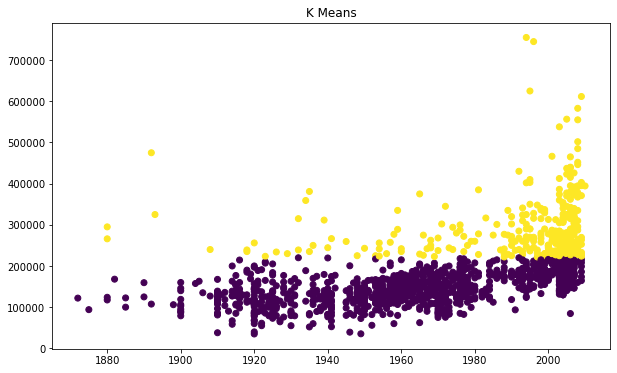

In [53]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['YearBuilt'], house ['SalePrice'], c=kmeans.labels_, cmap='viridis' )
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/YearBuiltFig.png')

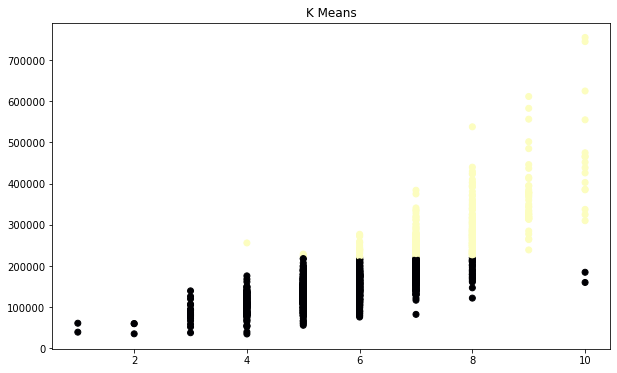

In [54]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['OverallQual'], house ['SalePrice'], c=kmeans.labels_, cmap='magma' )
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/OverallQualPriceFig.png')

## The plot below is really interesting to me because it represents opportunity. 
The houses on the lower end of overall condition score are selling at lower prices. Given the previous graph we saw where remodeled homes sell for higher prices, identifying these homes as investment opportunities would be useful. 

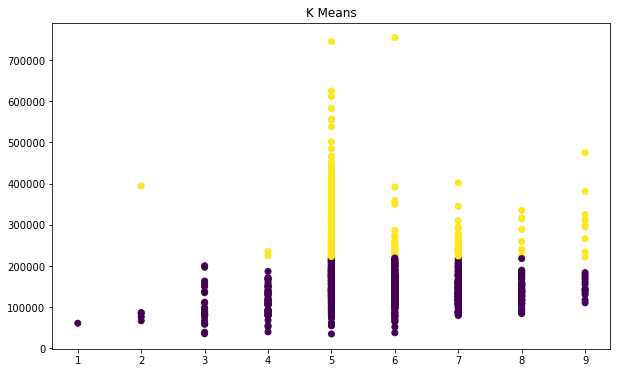

In [55]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['OverallCond'], house ['SalePrice'], c=kmeans.labels_, cmap='viridis' )
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/CondPriceFig.png')

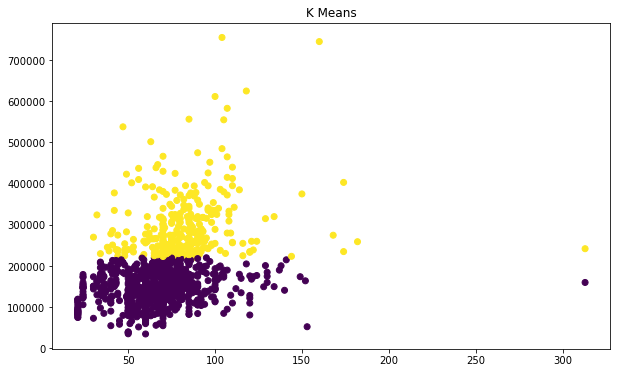

In [56]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['LotFrontage'], house ['SalePrice'], c=kmeans.labels_, cmap="viridis")
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/FrontageSalePrice.png')

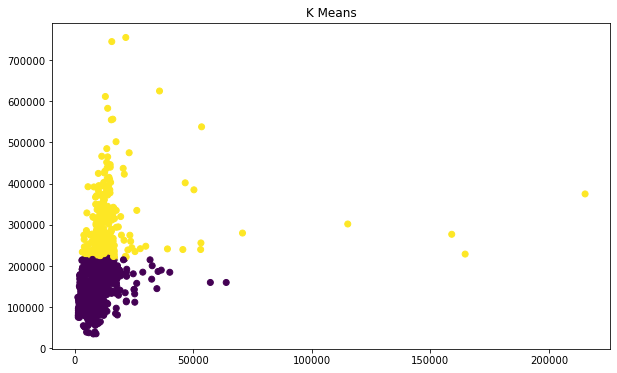

In [57]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['LotArea'], house ['SalePrice'], c=kmeans.labels_, cmap='viridis' )
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/YardPriceFig.png')

#### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
Does the type of house matter to homebuyers' bottom line?

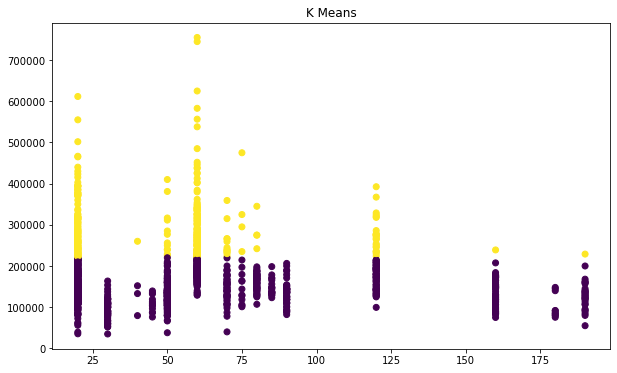

In [58]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['MSSubClass'], house ['SalePrice'], c=kmeans.labels_, cmap='viridis' )

#### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
Does location, location, location really matter?

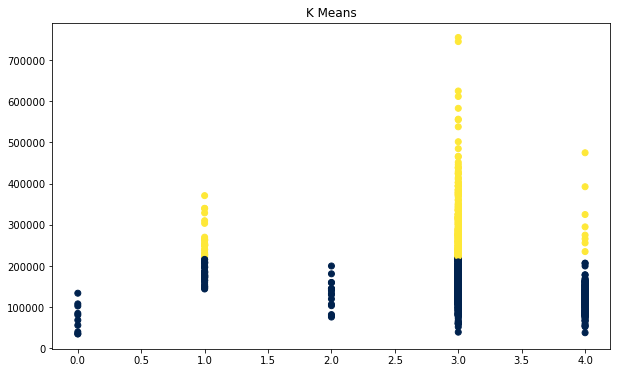

In [59]:
plt.figure(figsize= (10,6))
plt.title('K Means')
plt.scatter(house['MSZoning'], house ['SalePrice'], c=kmeans.labels_, cmap='cividis' )
plt.savefig('C:/Users/Marcy/Documents/Entity Coursework/Final Project/MSZonePriceFig.png')

## K-Nearest Neighbors 

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


#### Scaling Your Data
KNN is based completely on distance from one point to another, so you need to make sure that all of the data is on the same scale. If some of the variables were in inches and some of it was in yards, it could do some funky things to your results. Luckily, sklearn has a tool just for such a happenstance!

In [61]:
scaler = StandardScaler()
scaler.fit(house)
scaledVariables = scaler.transform(house)
houseScaled = pd.DataFrame(scaledVariables, columns = house.columns)

In [62]:
a=houseScaled
b=house['SalePrice']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(a,b,test_size=0.3)

## Analysis

In [64]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [65]:
print(confusion_matrix(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

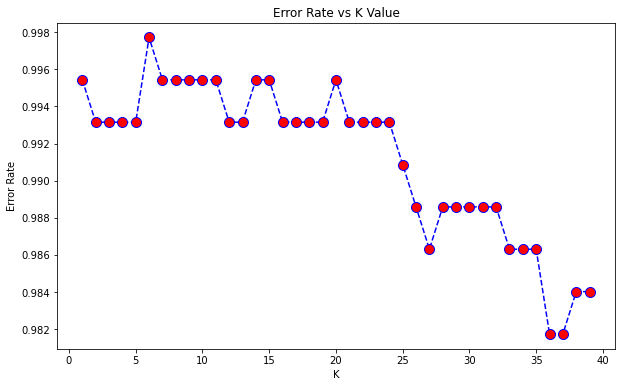

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Run the final model

In [74]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [75]:
pred

array([134500, 110000, 100000, 315000, 187500, 250000, 119500, 123000,
       119000, 144152, 160200, 105000, 253293,  79500, 123000,  82500,
       100000,  82500, 193879, 128500, 112000, 124000,  89000, 155000,
        81000, 124500, 253293, 160200, 165600, 144152,  79500, 143000,
       210000, 259000, 260000, 135000,  79500, 181000, 161500, 111250,
        80000, 212000, 159895, 150000, 133900,  87000,  89000, 134500,
       185000, 283463, 165400, 315000, 120000,  67000, 159000, 130500,
        79500,  67000, 130500, 192000, 125000, 180000, 315000, 280000,
       192000,  82500, 195000, 127000, 125000, 173500,  52500, 139950,
        82500, 176000,  89000, 160200, 148000, 147000, 107000, 148800,
        84500, 117000, 181134, 110000,  86000, 117000,  80000,  85500,
        87000, 109000, 116050, 108000, 109000, 172500, 160200, 148800,
       315000,  97500, 227680, 183200, 109008, 144152, 135000, 111250,
       123000,  93500,  75000, 179600, 128500, 155000, 214000, 179600,
      

In [71]:
house.to_csv("HouseClean.csv")